In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Criar a Regressão Linear

In [42]:
df_fit = pd.read_excel('./Frete Rodoviário.xlsx', header=None)
df_fit.head()

,0,1
0,1,15.42
1,50,22.72
2,100,30.18
3,150,37.63
4,200,45.08


In [43]:
x, y = np.array(df_fit[0]), np.array(df_fit[1])
print(x, y)

[   1   50  100  150  200  250  300  350  400  450  500  501  550  600
  650  700  750  800  850  900  950 1000 1001 1050 1100 1150 1200 1250
 1300 1350 1400 1450 1500 1501 1550 1600 1650 1700 1750 1800 1850 1900
 1950 2000 2001 2050 2100 2150 2200 2250] [ 15.42  22.72  30.18  37.63  45.08  52.54  59.99  67.44  74.9   82.35
  89.8   89.95  97.26 104.71 112.16 119.62 127.07 134.52 141.98 149.43
 156.88 164.34 164.49 171.79 179.24 186.7  194.15 201.6  209.06 216.51
 223.96 231.42 238.87 239.02 246.32 253.78 261.23 268.68 276.14 283.59
 291.04 298.5  305.95 313.4  313.55 320.86 328.31 335.76 343.22 350.67]


<AxesSubplot:>

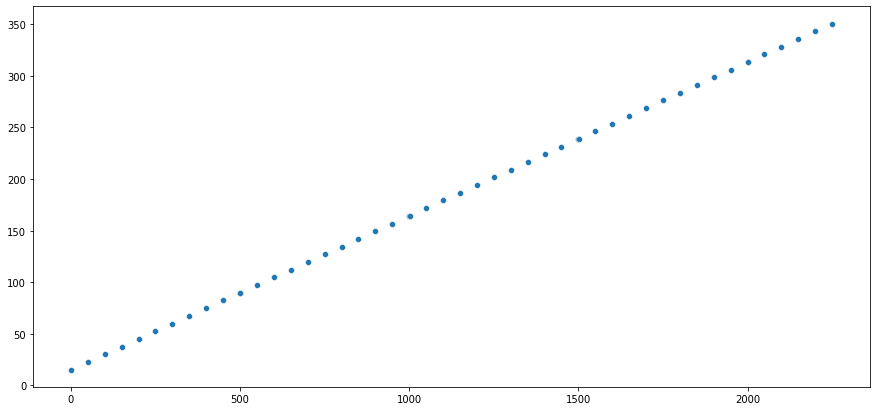

In [44]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x=x, y=y)

In [45]:
model = LinearRegression()
model.fit(X=x[:, np.newaxis], y=y)

LinearRegression()

In [46]:
r_score = model.score(x[:, np.newaxis], y)
print('r_score:', r_score)

r_score: 0.9999999992391856


In [47]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 15.269992230324846
slope: [0.1490667]


## Predizer os valores de acordo com as distâncias da api do google

### Distâncias de origem a porto

In [48]:
df_data = pd.read_excel('./ibge_dist_origem_porto.xlsx')
df_data.head()

,Origem,"SANTOS, SP, Brazil","VITÓRIA, ES, Brazil","SÃO LUIZ, MA, Brazil","ILHÉUS, BA, Brazil","SALVADOR, BA, Brazil","RIO GRANDE, RS, Brazil","SÃO FRANCISCO DO SUL, SC, Brazil","BARCARENA, PA, Brazil","SANTAREM, PA, Brazil","ITACOATIARA, AM, Brazil","PARANAGUA, PR, Brazil","IMBITUBA, SC, Brazil"
0,"Rio Verde, GO, Brazil",1003532,1383553,2265594,1744458,1875687,2128388,1339137,2149745,2467149,3315332,1262709,1538005
1,"Jataí, GO, Brazil",1060337,1474337,2357589,1834777,1966006,2132024,1342773,2241740,2379108,3227291,1266345,1541641
2,"Cristalina, GO, Brazil",953592,1113664,2121520,1284218,1541198,2209258,1420007,2068209,2499416,3752184,1324669,1618875
3,"Montividiu, GO, Brazil",1051604,1431626,2258471,1788833,1920062,2182623,1393373,2142623,2419121,3315085,1316945,1592241
4,"Paraúna, GO, Brazil",1059523,1439545,2138750,1669111,1800341,2315189,1525939,2022901,2439403,3430230,1430600,1724807


In [49]:
df_ans = df_data

In [50]:
cols = set(df_data.columns)
for c in cols:
    if c == 'Origem': continue
    pred_x = np.array(df_data[c])
    pred_x = pred_x / 1000
    pred_y = model.predict(pred_x[:, np.newaxis])
    df_data[c] = pred_y

In [51]:
df_data.head()

,Origem,"SANTOS, SP, Brazil","VITÓRIA, ES, Brazil","SÃO LUIZ, MA, Brazil","ILHÉUS, BA, Brazil","SALVADOR, BA, Brazil","RIO GRANDE, RS, Brazil","SÃO FRANCISCO DO SUL, SC, Brazil","BARCARENA, PA, Brazil","SANTAREM, PA, Brazil","ITACOATIARA, AM, Brazil","PARANAGUA, PR, Brazil","IMBITUBA, SC, Brazil"
0,"Rio Verde, GO, Brazil",164.863193,221.511668,352.994607,275.310584,294.872458,332.541761,214.890722,335.725379,383.039745,509.475583,203.497852,244.535318
1,"Jataí, GO, Brazil",173.330927,235.044539,366.707997,288.774139,308.336013,333.083768,215.432728,349.438770,369.915764,496.351602,204.039859,245.077324
2,"Cristalina, GO, Brazil",157.418802,181.280206,331.517971,206.704128,245.011288,344.596785,226.945745,323.571077,387.849680,574.595668,212.734025,256.590341
3,"Montividiu, GO, Brazil",172.029127,228.677751,351.932804,281.925419,301.487293,340.626394,222.975503,334.663726,375.880369,509.438763,211.582634,252.620099
4,"Paraúna, GO, Brazil",173.209586,229.858211,334.086390,264.078856,283.640879,360.387569,242.736679,316.817163,378.903740,526.603048,228.524809,272.381275


In [52]:
df_data.to_excel('./ibge_cost_origem_porto.xlsx')

### Distâncias de Origem a Transbordo

In [53]:
df_data = pd.read_excel('./ibge_dist_origem_transbordo.xlsx')
df_data.head()

,Origem,"CANAÃ DOS CARAJÁS, PA, Brazil","PORTO NACIONAL, TO, Brazil","FIGUEIRÓPOLIS, TO, Brazil","PORANGATU, GO, Brazil","ANÁPOLIS, GO, Brazil","IPAMERI,GO, Brazil","RIO VERDE, GO, Brazil","SÃO SIMÃO, GO, Brazil","SÃO JOSÉ DA LAPA, MG, Brazil","LONDRINA, PR, Brazil","MARINGÁ, PR, Brazil"
0,"Rio Verde, GO, Brazil",1657417,1021535,815945,637192,294903,371708,0,176473,898720,778300,782389
1,"Jataí, GO, Brazil",1601984,1113530,907940,727510,385221,462491,92470,194644,989503,781936,786026
2,"Cristalina, GO, Brazil",1579060,880231,679387,528470,230887,170516,496330,548300,589399,1031235,1016648
3,"Montividiu, GO, Brazil",1650294,1014412,808822,626732,339278,419781,49634,230709,946793,832536,836625
4,"Paraúna, GO, Brazil",1530573,894690,689100,507010,219556,315206,127021,271308,954712,868936,919012


In [54]:
df_ans = df_data

In [55]:
cols = set(df_data.columns)
for c in cols:
    if c == 'Origem': continue
    pred_x = np.array(df_data[c])
    pred_x = pred_x / 1000
    pred_y = model.predict(pred_x[:, np.newaxis])
    df_data[c] = pred_y

In [56]:
df_ans.head()

,Origem,"CANAÃ DOS CARAJÁS, PA, Brazil","PORTO NACIONAL, TO, Brazil","FIGUEIRÓPOLIS, TO, Brazil","PORANGATU, GO, Brazil","ANÁPOLIS, GO, Brazil","IPAMERI,GO, Brazil","RIO VERDE, GO, Brazil","SÃO SIMÃO, GO, Brazil","SÃO JOSÉ DA LAPA, MG, Brazil","LONDRINA, PR, Brazil","MARINGÁ, PR, Brazil"
0,"Rio Verde, GO, Brazil",262.335670,167.546841,136.900218,110.254099,59.230208,70.679276,15.269992,41.576239,149.239214,131.288603,131.898136
1,"Jataí, GO, Brazil",254.072456,181.260231,150.613609,123.717505,72.693614,84.211998,29.054190,44.284930,162.771936,131.830609,132.440292
2,"Cristalina, GO, Brazil",250.655251,146.483120,116.543968,94.047270,49.687555,40.688249,89.256266,97.003262,103.129754,168.992788,166.818352
3,"Montividiu, GO, Brazil",261.273868,166.485038,135.838416,108.694861,65.845043,77.845359,22.668769,49.661021,156.405297,139.373384,139.982918
4,"Paraúna, GO, Brazil",243.427454,148.638475,117.991853,90.848298,47.998480,62.256710,34.204593,55.712980,157.585757,144.799412,152.264076


In [57]:
df_data.to_excel('./ibge_cost_origem_transbordo.xlsx')